In [1]:
from f_data_prep import *
from f_drosophila_infer import *

In [2]:
raw_data = np.loadtxt('../dmel_data.txt').T  # transpose the data so that the shape is 6078 cells x (3+6*99) columns
gene_exp = np.copy(raw_data[:,3:])  # excluding (x,y,z) coordinates)
complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

In [3]:
gene_complete = [gene_exp[:,i::6][:,np.array(comp_ind)] for i in range(6)]
data_diff = np.vstack([gene_complete[i+1] - gene_complete[i] for i in range(5)])
data_init = np.vstack([gene_complete[i] for i in range(5)])

In [4]:
print(data_diff.shape)
print(data_init.shape)

(30390, 27)
(30390, 27)


In [5]:
# w, sigma, bias = infer_drosophila(data_init, data_diff, max_iter=1000, power=1)
# with open('./pickles/w_gene_complete.pkl', 'wb') as f:
#     pickle.dump(w, f)
# f.close()
# with open('./pickles/sigma_gene_complete.pkl', 'wb') as f:
#     pickle.dump(sigma, f)
# f.close()
# with open('./pickles/bias_gene_complete.pkl', 'wb') as f:
#     pickle.dump(bias, f)

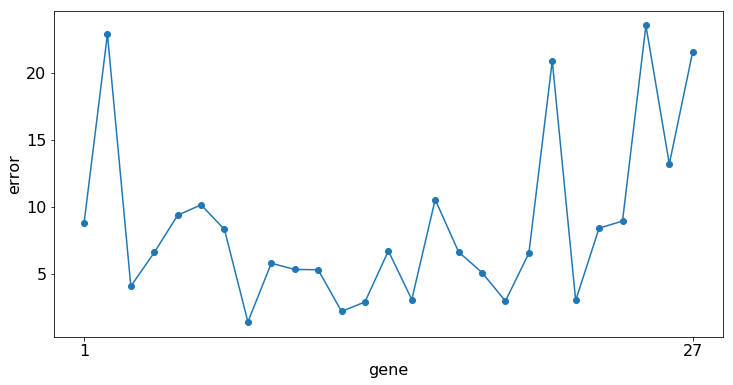

In [6]:
with open('./pickles/w_gene_complete.pkl', 'rb') as f:
    w = pickle.load(f)
with open('./pickles/sigma_gene_complete.pkl', 'rb') as f:
    sigma = pickle.load(f)
with open('./pickles/bias_gene_complete.pkl', 'rb') as f:
    bias = pickle.load(f)
    
diff_pred = np.tanh(bias + data_init.dot(w)) + sigma*npr.normal(size=(1,99))
error = np.sqrt(np.sum(np.abs(data_diff - diff_pred)**2, axis=0)/np.sum(np.abs(data_diff)**2, axis=0))

plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size':16})
plt.plot(range(27), error, 'o-')
plt.xticks([0,26],['1','27'])
plt.xlabel('gene')
plt.ylabel('error')
plt.show()